# Part 2: Percentage of Training Dataset

### Goal: 
Use 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, and 100% of the total training dataset to train the neural work and test on it, respectively. You build 9 systems. Plot a graph where the axis indicate the percentage of the training set you used to train a system, and y-axis indicate the accuracy on the test set of each system  

In [1]:
import warnings 
warnings.filterwarnings('ignore') # feel free to comment this out 

import h5py
import numpy as np
import matplotlib.pyplot as plt 

import sklearn 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras import models 
from keras.layers import Dense
from keras import optimizers 
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import math

import tensorflow as tf

Using TensorFlow backend.


In [2]:
def dataProcessing(): 
    wine = sklearn.datasets.load_wine()
    
    df = pd.DataFrame(wine.data)
    df.columns = wine.feature_names
    df["class"] = wine.target
    
    labels = df.loc[:,["class"]] 
    features = df.drop(["class"],axis=1)
    
    xtrain, xtest, ytrain, ytest = train_test_split(features, labels)
    ytrain = to_categorical(ytrain, 3)
    ytest = to_categorical(ytest,3)
    
    scale = MinMaxScaler(feature_range=(0,1))
    xtrain = scale.fit_transform(xtrain)
    xtest = scale.fit_transform(xtest)
    
    return xtrain, xtest, ytrain, ytest

Discussion:    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I used the training set percentage to find the compliment(validation split). In other words, if I want 20% of the training set to be used during training, I'll just utilize validation_split attribute in model.fit() with the compliment, 80%. 

In [3]:
def trainModel(val_split, xtrain, ytrain):
    '''
    Builds and runs training model 
    '''
    print("Training the Model")
    
    model = Sequential()
    model.add(Dense(10, input_dim=xtrain.shape[1],activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])
    
    # Save weights 
    checkpoint = ModelCheckpoint("model_part2.hdf5", monitor="loss", verbose=1, save_best_only = True, mode="auto", period=1)
    
    # Apply early stopping to prevent overfitting 
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto',restore_best_weights=True)
    
    # Run Model 
    history = model.fit(xtrain, ytrain, batch_size=50, epochs=2000, verbose =0, validation_split=val_split, callbacks=[checkpoint,monitor])


In [4]:
def testModel(xtest, ytest): 
    '''
    Builds and runs testing model 
    '''
    print("Testing the model")
    
    evalModel = Sequential()
    evalModel.add(Dense(10, input_dim=xtest.shape[1],activation='relu'))
    evalModel.add(Dense(8, activation='relu'))
    evalModel.add(Dense(6, activation='relu'))
    evalModel.add(Dense(6, activation='relu'))
    evalModel.add(Dense(4, activation='relu'))
    evalModel.add(Dense(3, activation='softmax'))


    evalModel.load_weights('model_part2.hdf5')
    evalModel.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])
    
    lossAndAcc = evalModel.evaluate(xtest, ytest)

    return lossAndAcc[1]

In [5]:
def main(train_sizes, accuracy): 
    '''
    Main driver for program 
    '''

    xtrain, xtest, ytrain, ytest = dataProcessing()

    for i in range(len(train_sizes)): 
        print("====================================================")
        print("Percent Training Size ", train_sizes[i])
        
        validation_split = round(1-train_sizes[i],2)
        
        # Train Model
        trainModel(validation_split, xtrain, ytrain)
        
        # Test Model 
        currAcc = testModel(xtest, ytest)
        
        # Add accuracy to our list 
        accuracy.append(currAcc)
        
        print("====================================================\n")
    return accuracy 
        

In [6]:
accuracy = []
train_sizes = [0.20, 0.30, 0.40, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

accuracy = main(train_sizes, accuracy)

Percent Training Size  0.2
Training the Model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

Epoch 00001: loss improved from inf to 1.09674, saving model to model_part2.hdf5

Epoch 00002: loss improved from 1.09674 to 1.09497, saving model to model_part2.hdf5

Epoch 00003: loss improved from 1.09497 to 1.09381, saving model to model_part2.hdf5

Epoch 00004: loss improved from 1.09381 to 1.09282, saving model to model_part2.hdf5

Epoch 00005: loss improved from 1.09282 to 1.09192, saving model to model_part2.hdf5

Epoch 00006: loss improved from 1.09192 to 1.09115, saving model to model_part2.hdf5

Epoch 00007: loss improved from 1.09115 to 1.09035, saving model to model_part2.hdf5

Epoch 00008: loss improved from 1.09035 to 1.08948, saving model to model_part2.hdf5

Epoch 00009: loss improved from 1.08948 to 1.08871, saving model to model_part2.hdf5

Epoch 00010: loss improved from 1.08871 to 1.08800, saving mode


Epoch 00091: loss improved from 0.97647 to 0.97405, saving model to model_part2.hdf5

Epoch 00092: loss improved from 0.97405 to 0.97202, saving model to model_part2.hdf5

Epoch 00093: loss improved from 0.97202 to 0.97006, saving model to model_part2.hdf5

Epoch 00094: loss improved from 0.97006 to 0.96787, saving model to model_part2.hdf5

Epoch 00095: loss improved from 0.96787 to 0.96606, saving model to model_part2.hdf5

Epoch 00096: loss improved from 0.96606 to 0.96409, saving model to model_part2.hdf5

Epoch 00097: loss improved from 0.96409 to 0.96202, saving model to model_part2.hdf5

Epoch 00098: loss improved from 0.96202 to 0.96016, saving model to model_part2.hdf5

Epoch 00099: loss improved from 0.96016 to 0.95832, saving model to model_part2.hdf5

Epoch 00100: loss improved from 0.95832 to 0.95655, saving model to model_part2.hdf5

Epoch 00101: loss improved from 0.95655 to 0.95450, saving model to model_part2.hdf5

Epoch 00102: loss improved from 0.95450 to 0.95282, s


Epoch 00188: loss improved from 0.77661 to 0.77419, saving model to model_part2.hdf5

Epoch 00189: loss improved from 0.77419 to 0.77161, saving model to model_part2.hdf5

Epoch 00190: loss improved from 0.77161 to 0.76922, saving model to model_part2.hdf5

Epoch 00191: loss improved from 0.76922 to 0.76689, saving model to model_part2.hdf5

Epoch 00192: loss improved from 0.76689 to 0.76430, saving model to model_part2.hdf5

Epoch 00193: loss improved from 0.76430 to 0.76183, saving model to model_part2.hdf5

Epoch 00194: loss improved from 0.76183 to 0.75961, saving model to model_part2.hdf5

Epoch 00195: loss improved from 0.75961 to 0.75714, saving model to model_part2.hdf5

Epoch 00196: loss improved from 0.75714 to 0.75474, saving model to model_part2.hdf5

Epoch 00197: loss improved from 0.75474 to 0.75281, saving model to model_part2.hdf5

Epoch 00198: loss improved from 0.75281 to 0.75007, saving model to model_part2.hdf5

Epoch 00199: loss improved from 0.75007 to 0.74781, s


Epoch 00287: loss improved from 0.56822 to 0.56659, saving model to model_part2.hdf5

Epoch 00288: loss improved from 0.56659 to 0.56465, saving model to model_part2.hdf5

Epoch 00289: loss improved from 0.56465 to 0.56282, saving model to model_part2.hdf5

Epoch 00290: loss improved from 0.56282 to 0.56124, saving model to model_part2.hdf5

Epoch 00291: loss improved from 0.56124 to 0.56042, saving model to model_part2.hdf5

Epoch 00292: loss improved from 0.56042 to 0.55774, saving model to model_part2.hdf5

Epoch 00293: loss improved from 0.55774 to 0.55611, saving model to model_part2.hdf5

Epoch 00294: loss improved from 0.55611 to 0.55441, saving model to model_part2.hdf5

Epoch 00295: loss improved from 0.55441 to 0.55299, saving model to model_part2.hdf5

Epoch 00296: loss improved from 0.55299 to 0.55103, saving model to model_part2.hdf5

Epoch 00297: loss improved from 0.55103 to 0.54978, saving model to model_part2.hdf5

Epoch 00298: loss improved from 0.54978 to 0.54792, s


Epoch 00392: loss improved from 0.39762 to 0.39663, saving model to model_part2.hdf5

Epoch 00393: loss improved from 0.39663 to 0.39457, saving model to model_part2.hdf5

Epoch 00394: loss improved from 0.39457 to 0.39380, saving model to model_part2.hdf5

Epoch 00395: loss improved from 0.39380 to 0.39115, saving model to model_part2.hdf5

Epoch 00396: loss improved from 0.39115 to 0.39058, saving model to model_part2.hdf5

Epoch 00397: loss did not improve from 0.39058

Epoch 00398: loss improved from 0.39058 to 0.38734, saving model to model_part2.hdf5

Epoch 00399: loss improved from 0.38734 to 0.38493, saving model to model_part2.hdf5

Epoch 00400: loss improved from 0.38493 to 0.38375, saving model to model_part2.hdf5

Epoch 00401: loss improved from 0.38375 to 0.38272, saving model to model_part2.hdf5

Epoch 00402: loss improved from 0.38272 to 0.38027, saving model to model_part2.hdf5

Epoch 00403: loss improved from 0.38027 to 0.37847, saving model to model_part2.hdf5

Epoch


Epoch 00494: loss improved from 0.25797 to 0.25649, saving model to model_part2.hdf5

Epoch 00495: loss improved from 0.25649 to 0.25574, saving model to model_part2.hdf5

Epoch 00496: loss improved from 0.25574 to 0.25420, saving model to model_part2.hdf5

Epoch 00497: loss improved from 0.25420 to 0.25362, saving model to model_part2.hdf5

Epoch 00498: loss improved from 0.25362 to 0.25246, saving model to model_part2.hdf5

Epoch 00499: loss improved from 0.25246 to 0.25138, saving model to model_part2.hdf5

Epoch 00500: loss improved from 0.25138 to 0.25040, saving model to model_part2.hdf5

Epoch 00501: loss improved from 0.25040 to 0.24968, saving model to model_part2.hdf5

Epoch 00502: loss improved from 0.24968 to 0.24937, saving model to model_part2.hdf5

Epoch 00503: loss improved from 0.24937 to 0.24774, saving model to model_part2.hdf5

Epoch 00504: loss improved from 0.24774 to 0.24676, saving model to model_part2.hdf5

Epoch 00505: loss did not improve from 0.24676

Epoch


Epoch 00056: loss improved from 1.04051 to 1.03931, saving model to model_part2.hdf5

Epoch 00057: loss improved from 1.03931 to 1.03829, saving model to model_part2.hdf5

Epoch 00058: loss improved from 1.03829 to 1.03620, saving model to model_part2.hdf5

Epoch 00059: loss improved from 1.03620 to 1.03509, saving model to model_part2.hdf5

Epoch 00060: loss improved from 1.03509 to 1.03345, saving model to model_part2.hdf5

Epoch 00061: loss improved from 1.03345 to 1.03234, saving model to model_part2.hdf5

Epoch 00062: loss improved from 1.03234 to 1.03009, saving model to model_part2.hdf5

Epoch 00063: loss improved from 1.03009 to 1.02854, saving model to model_part2.hdf5

Epoch 00064: loss improved from 1.02854 to 1.02713, saving model to model_part2.hdf5

Epoch 00065: loss improved from 1.02713 to 1.02545, saving model to model_part2.hdf5

Epoch 00066: loss improved from 1.02545 to 1.02363, saving model to model_part2.hdf5

Epoch 00067: loss improved from 1.02363 to 1.02163, s


Epoch 00153: loss improved from 0.77196 to 0.76979, saving model to model_part2.hdf5

Epoch 00154: loss improved from 0.76979 to 0.76439, saving model to model_part2.hdf5

Epoch 00155: loss improved from 0.76439 to 0.76097, saving model to model_part2.hdf5

Epoch 00156: loss improved from 0.76097 to 0.75791, saving model to model_part2.hdf5

Epoch 00157: loss improved from 0.75791 to 0.75447, saving model to model_part2.hdf5

Epoch 00158: loss improved from 0.75447 to 0.75035, saving model to model_part2.hdf5

Epoch 00159: loss improved from 0.75035 to 0.74737, saving model to model_part2.hdf5

Epoch 00160: loss improved from 0.74737 to 0.74309, saving model to model_part2.hdf5

Epoch 00161: loss improved from 0.74309 to 0.73968, saving model to model_part2.hdf5

Epoch 00162: loss improved from 0.73968 to 0.73589, saving model to model_part2.hdf5

Epoch 00163: loss improved from 0.73589 to 0.73233, saving model to model_part2.hdf5

Epoch 00164: loss improved from 0.73233 to 0.72893, s


Epoch 00257: loss improved from 0.47367 to 0.47109, saving model to model_part2.hdf5

Epoch 00258: loss improved from 0.47109 to 0.47068, saving model to model_part2.hdf5

Epoch 00259: loss improved from 0.47068 to 0.46649, saving model to model_part2.hdf5

Epoch 00260: loss improved from 0.46649 to 0.46356, saving model to model_part2.hdf5

Epoch 00261: loss improved from 0.46356 to 0.46110, saving model to model_part2.hdf5

Epoch 00262: loss improved from 0.46110 to 0.45861, saving model to model_part2.hdf5

Epoch 00263: loss improved from 0.45861 to 0.45609, saving model to model_part2.hdf5

Epoch 00264: loss improved from 0.45609 to 0.45354, saving model to model_part2.hdf5

Epoch 00265: loss improved from 0.45354 to 0.45104, saving model to model_part2.hdf5

Epoch 00266: loss improved from 0.45104 to 0.44961, saving model to model_part2.hdf5

Epoch 00267: loss improved from 0.44961 to 0.44926, saving model to model_part2.hdf5

Epoch 00268: loss improved from 0.44926 to 0.44853, s


Epoch 00354: loss improved from 0.24049 to 0.23768, saving model to model_part2.hdf5

Epoch 00355: loss improved from 0.23768 to 0.23602, saving model to model_part2.hdf5

Epoch 00356: loss improved from 0.23602 to 0.23339, saving model to model_part2.hdf5

Epoch 00357: loss improved from 0.23339 to 0.23247, saving model to model_part2.hdf5

Epoch 00358: loss improved from 0.23247 to 0.22914, saving model to model_part2.hdf5

Epoch 00359: loss improved from 0.22914 to 0.22749, saving model to model_part2.hdf5

Epoch 00360: loss improved from 0.22749 to 0.22454, saving model to model_part2.hdf5

Epoch 00361: loss improved from 0.22454 to 0.22281, saving model to model_part2.hdf5

Epoch 00362: loss improved from 0.22281 to 0.22019, saving model to model_part2.hdf5

Epoch 00363: loss improved from 0.22019 to 0.21931, saving model to model_part2.hdf5

Epoch 00364: loss improved from 0.21931 to 0.21652, saving model to model_part2.hdf5

Epoch 00365: loss improved from 0.21652 to 0.21501, s


Epoch 00066: loss improved from 0.81927 to 0.81416, saving model to model_part2.hdf5

Epoch 00067: loss did not improve from 0.81416

Epoch 00068: loss improved from 0.81416 to 0.80668, saving model to model_part2.hdf5

Epoch 00069: loss improved from 0.80668 to 0.80159, saving model to model_part2.hdf5

Epoch 00070: loss improved from 0.80159 to 0.79684, saving model to model_part2.hdf5

Epoch 00071: loss improved from 0.79684 to 0.79304, saving model to model_part2.hdf5

Epoch 00072: loss improved from 0.79304 to 0.78824, saving model to model_part2.hdf5

Epoch 00073: loss improved from 0.78824 to 0.78063, saving model to model_part2.hdf5

Epoch 00074: loss improved from 0.78063 to 0.77841, saving model to model_part2.hdf5

Epoch 00075: loss improved from 0.77841 to 0.76897, saving model to model_part2.hdf5

Epoch 00076: loss improved from 0.76897 to 0.76679, saving model to model_part2.hdf5

Epoch 00077: loss improved from 0.76679 to 0.75884, saving model to model_part2.hdf5

Epoch


Epoch 00176: loss improved from 0.38074 to 0.37586, saving model to model_part2.hdf5

Epoch 00177: loss improved from 0.37586 to 0.37386, saving model to model_part2.hdf5

Epoch 00178: loss did not improve from 0.37386

Epoch 00179: loss did not improve from 0.37386

Epoch 00180: loss did not improve from 0.37386
Testing the model
45/45 [==============================] - 0s 1ms/step

Percent Training Size  0.5
Training the Model

Epoch 00001: loss improved from inf to 1.09580, saving model to model_part2.hdf5

Epoch 00002: loss improved from 1.09580 to 1.09373, saving model to model_part2.hdf5

Epoch 00003: loss improved from 1.09373 to 1.09161, saving model to model_part2.hdf5

Epoch 00004: loss improved from 1.09161 to 1.08900, saving model to model_part2.hdf5

Epoch 00005: loss improved from 1.08900 to 1.08688, saving model to model_part2.hdf5

Epoch 00006: loss improved from 1.08688 to 1.08499, saving model to model_part2.hdf5

Epoch 00007: loss improved from 1.08499 to 1.08185, s


Epoch 00098: loss improved from 0.61955 to 0.61298, saving model to model_part2.hdf5

Epoch 00099: loss improved from 0.61298 to 0.60772, saving model to model_part2.hdf5

Epoch 00100: loss did not improve from 0.60772

Epoch 00101: loss improved from 0.60772 to 0.60060, saving model to model_part2.hdf5

Epoch 00102: loss improved from 0.60060 to 0.58771, saving model to model_part2.hdf5

Epoch 00103: loss improved from 0.58771 to 0.58273, saving model to model_part2.hdf5

Epoch 00104: loss improved from 0.58273 to 0.57779, saving model to model_part2.hdf5

Epoch 00105: loss improved from 0.57779 to 0.57380, saving model to model_part2.hdf5

Epoch 00106: loss improved from 0.57380 to 0.56673, saving model to model_part2.hdf5

Epoch 00107: loss improved from 0.56673 to 0.55945, saving model to model_part2.hdf5

Epoch 00108: loss improved from 0.55945 to 0.55583, saving model to model_part2.hdf5

Epoch 00109: loss improved from 0.55583 to 0.54840, saving model to model_part2.hdf5

Epoch


Epoch 00204: loss improved from 0.16721 to 0.16611, saving model to model_part2.hdf5

Epoch 00205: loss improved from 0.16611 to 0.16584, saving model to model_part2.hdf5

Epoch 00206: loss improved from 0.16584 to 0.16228, saving model to model_part2.hdf5

Epoch 00207: loss improved from 0.16228 to 0.15722, saving model to model_part2.hdf5

Epoch 00208: loss did not improve from 0.15722

Epoch 00209: loss did not improve from 0.15722

Epoch 00210: loss improved from 0.15722 to 0.15102, saving model to model_part2.hdf5

Epoch 00211: loss improved from 0.15102 to 0.14826, saving model to model_part2.hdf5

Epoch 00212: loss improved from 0.14826 to 0.14810, saving model to model_part2.hdf5
Testing the model
45/45 [==============================] - 0s 1ms/step

Percent Training Size  0.6
Training the Model

Epoch 00001: loss improved from inf to 1.09698, saving model to model_part2.hdf5

Epoch 00002: loss improved from 1.09698 to 1.09208, saving model to model_part2.hdf5

Epoch 00003: lo


Epoch 00091: loss improved from 0.81176 to 0.80993, saving model to model_part2.hdf5

Epoch 00092: loss improved from 0.80993 to 0.80733, saving model to model_part2.hdf5

Epoch 00093: loss improved from 0.80733 to 0.80575, saving model to model_part2.hdf5

Epoch 00094: loss improved from 0.80575 to 0.80390, saving model to model_part2.hdf5

Epoch 00095: loss improved from 0.80390 to 0.80209, saving model to model_part2.hdf5

Epoch 00096: loss improved from 0.80209 to 0.80010, saving model to model_part2.hdf5

Epoch 00097: loss improved from 0.80010 to 0.79821, saving model to model_part2.hdf5

Epoch 00098: loss improved from 0.79821 to 0.79715, saving model to model_part2.hdf5

Epoch 00099: loss improved from 0.79715 to 0.79504, saving model to model_part2.hdf5

Epoch 00100: loss improved from 0.79504 to 0.79337, saving model to model_part2.hdf5

Epoch 00101: loss improved from 0.79337 to 0.79209, saving model to model_part2.hdf5

Epoch 00102: loss improved from 0.79209 to 0.79033, s


Epoch 00189: loss did not improve from 0.70049

Epoch 00190: loss improved from 0.70049 to 0.69808, saving model to model_part2.hdf5

Epoch 00191: loss improved from 0.69808 to 0.69726, saving model to model_part2.hdf5

Epoch 00192: loss improved from 0.69726 to 0.69605, saving model to model_part2.hdf5

Epoch 00193: loss improved from 0.69605 to 0.69510, saving model to model_part2.hdf5

Epoch 00194: loss improved from 0.69510 to 0.69349, saving model to model_part2.hdf5

Epoch 00195: loss improved from 0.69349 to 0.69229, saving model to model_part2.hdf5

Epoch 00196: loss improved from 0.69229 to 0.69114, saving model to model_part2.hdf5

Epoch 00197: loss improved from 0.69114 to 0.69018, saving model to model_part2.hdf5

Epoch 00198: loss improved from 0.69018 to 0.68853, saving model to model_part2.hdf5

Epoch 00199: loss improved from 0.68853 to 0.68726, saving model to model_part2.hdf5

Epoch 00200: loss improved from 0.68726 to 0.68594, saving model to model_part2.hdf5

Epoch


Epoch 00010: loss improved from 1.07544 to 1.07434, saving model to model_part2.hdf5

Epoch 00011: loss improved from 1.07434 to 1.07296, saving model to model_part2.hdf5

Epoch 00012: loss improved from 1.07296 to 1.07142, saving model to model_part2.hdf5

Epoch 00013: loss improved from 1.07142 to 1.07008, saving model to model_part2.hdf5

Epoch 00014: loss improved from 1.07008 to 1.06881, saving model to model_part2.hdf5

Epoch 00015: loss improved from 1.06881 to 1.06714, saving model to model_part2.hdf5

Epoch 00016: loss improved from 1.06714 to 1.06554, saving model to model_part2.hdf5

Epoch 00017: loss improved from 1.06554 to 1.06422, saving model to model_part2.hdf5

Epoch 00018: loss improved from 1.06422 to 1.06192, saving model to model_part2.hdf5

Epoch 00019: loss improved from 1.06192 to 1.05975, saving model to model_part2.hdf5

Epoch 00020: loss improved from 1.05975 to 1.05728, saving model to model_part2.hdf5

Epoch 00021: loss improved from 1.05728 to 1.05449, s


Epoch 00107: loss improved from 0.75591 to 0.75363, saving model to model_part2.hdf5

Epoch 00108: loss improved from 0.75363 to 0.75161, saving model to model_part2.hdf5

Epoch 00109: loss improved from 0.75161 to 0.74927, saving model to model_part2.hdf5

Epoch 00110: loss improved from 0.74927 to 0.74706, saving model to model_part2.hdf5

Epoch 00111: loss improved from 0.74706 to 0.74478, saving model to model_part2.hdf5

Epoch 00112: loss improved from 0.74478 to 0.74364, saving model to model_part2.hdf5

Epoch 00113: loss improved from 0.74364 to 0.74043, saving model to model_part2.hdf5

Epoch 00114: loss improved from 0.74043 to 0.73787, saving model to model_part2.hdf5

Epoch 00115: loss improved from 0.73787 to 0.73608, saving model to model_part2.hdf5

Epoch 00116: loss did not improve from 0.73608

Epoch 00117: loss improved from 0.73608 to 0.73203, saving model to model_part2.hdf5

Epoch 00118: loss improved from 0.73203 to 0.72994, saving model to model_part2.hdf5

Epoch


Epoch 00208: loss improved from 0.54884 to 0.54647, saving model to model_part2.hdf5

Epoch 00209: loss improved from 0.54647 to 0.54441, saving model to model_part2.hdf5

Epoch 00210: loss improved from 0.54441 to 0.54263, saving model to model_part2.hdf5

Epoch 00211: loss improved from 0.54263 to 0.53981, saving model to model_part2.hdf5

Epoch 00212: loss improved from 0.53981 to 0.53843, saving model to model_part2.hdf5

Epoch 00213: loss improved from 0.53843 to 0.53580, saving model to model_part2.hdf5

Epoch 00214: loss improved from 0.53580 to 0.53376, saving model to model_part2.hdf5

Epoch 00215: loss improved from 0.53376 to 0.53172, saving model to model_part2.hdf5

Epoch 00216: loss improved from 0.53172 to 0.52938, saving model to model_part2.hdf5

Epoch 00217: loss improved from 0.52938 to 0.52662, saving model to model_part2.hdf5

Epoch 00218: loss improved from 0.52662 to 0.52447, saving model to model_part2.hdf5

Epoch 00219: loss did not improve from 0.52447

Epoch


Epoch 00313: loss did not improve from 0.33757

Epoch 00314: loss did not improve from 0.33757

Epoch 00315: loss improved from 0.33757 to 0.33695, saving model to model_part2.hdf5

Epoch 00316: loss improved from 0.33695 to 0.33100, saving model to model_part2.hdf5

Epoch 00317: loss improved from 0.33100 to 0.32926, saving model to model_part2.hdf5

Epoch 00318: loss did not improve from 0.32926

Epoch 00319: loss improved from 0.32926 to 0.32622, saving model to model_part2.hdf5

Epoch 00320: loss did not improve from 0.32622

Epoch 00321: loss improved from 0.32622 to 0.32426, saving model to model_part2.hdf5

Epoch 00322: loss improved from 0.32426 to 0.32097, saving model to model_part2.hdf5

Epoch 00323: loss improved from 0.32097 to 0.32005, saving model to model_part2.hdf5

Epoch 00324: loss improved from 0.32005 to 0.31743, saving model to model_part2.hdf5

Epoch 00325: loss did not improve from 0.31743

Epoch 00326: loss improved from 0.31743 to 0.31490, saving model to mod


Epoch 00061: loss improved from 0.78177 to 0.77762, saving model to model_part2.hdf5

Epoch 00062: loss improved from 0.77762 to 0.77499, saving model to model_part2.hdf5

Epoch 00063: loss improved from 0.77499 to 0.77061, saving model to model_part2.hdf5

Epoch 00064: loss improved from 0.77061 to 0.76689, saving model to model_part2.hdf5

Epoch 00065: loss improved from 0.76689 to 0.76338, saving model to model_part2.hdf5

Epoch 00066: loss improved from 0.76338 to 0.76033, saving model to model_part2.hdf5

Epoch 00067: loss improved from 0.76033 to 0.75573, saving model to model_part2.hdf5

Epoch 00068: loss improved from 0.75573 to 0.75243, saving model to model_part2.hdf5

Epoch 00069: loss improved from 0.75243 to 0.74814, saving model to model_part2.hdf5

Epoch 00070: loss improved from 0.74814 to 0.74547, saving model to model_part2.hdf5

Epoch 00071: loss improved from 0.74547 to 0.74344, saving model to model_part2.hdf5

Epoch 00072: loss improved from 0.74344 to 0.73851, s


Epoch 00162: loss improved from 0.45174 to 0.44986, saving model to model_part2.hdf5

Epoch 00163: loss improved from 0.44986 to 0.44564, saving model to model_part2.hdf5

Epoch 00164: loss improved from 0.44564 to 0.44263, saving model to model_part2.hdf5

Epoch 00165: loss improved from 0.44263 to 0.44056, saving model to model_part2.hdf5

Epoch 00166: loss improved from 0.44056 to 0.43860, saving model to model_part2.hdf5

Epoch 00167: loss improved from 0.43860 to 0.43688, saving model to model_part2.hdf5

Epoch 00168: loss improved from 0.43688 to 0.42933, saving model to model_part2.hdf5

Epoch 00169: loss improved from 0.42933 to 0.42627, saving model to model_part2.hdf5

Epoch 00170: loss improved from 0.42627 to 0.42321, saving model to model_part2.hdf5

Epoch 00171: loss improved from 0.42321 to 0.42073, saving model to model_part2.hdf5

Epoch 00172: loss improved from 0.42073 to 0.41600, saving model to model_part2.hdf5

Epoch 00173: loss improved from 0.41600 to 0.41446, s


Epoch 00026: loss improved from 0.85627 to 0.85063, saving model to model_part2.hdf5

Epoch 00027: loss improved from 0.85063 to 0.84585, saving model to model_part2.hdf5

Epoch 00028: loss improved from 0.84585 to 0.83993, saving model to model_part2.hdf5

Epoch 00029: loss improved from 0.83993 to 0.83511, saving model to model_part2.hdf5

Epoch 00030: loss improved from 0.83511 to 0.83343, saving model to model_part2.hdf5

Epoch 00031: loss improved from 0.83343 to 0.82658, saving model to model_part2.hdf5

Epoch 00032: loss improved from 0.82658 to 0.82257, saving model to model_part2.hdf5

Epoch 00033: loss improved from 0.82257 to 0.81828, saving model to model_part2.hdf5

Epoch 00034: loss improved from 0.81828 to 0.81416, saving model to model_part2.hdf5

Epoch 00035: loss improved from 0.81416 to 0.80975, saving model to model_part2.hdf5

Epoch 00036: loss improved from 0.80975 to 0.80574, saving model to model_part2.hdf5

Epoch 00037: loss improved from 0.80574 to 0.80329, s


Epoch 00122: loss improved from 0.33439 to 0.32939, saving model to model_part2.hdf5

Epoch 00123: loss improved from 0.32939 to 0.32547, saving model to model_part2.hdf5

Epoch 00124: loss improved from 0.32547 to 0.32160, saving model to model_part2.hdf5

Epoch 00125: loss improved from 0.32160 to 0.31712, saving model to model_part2.hdf5

Epoch 00126: loss improved from 0.31712 to 0.31323, saving model to model_part2.hdf5

Epoch 00127: loss improved from 0.31323 to 0.30877, saving model to model_part2.hdf5

Epoch 00128: loss improved from 0.30877 to 0.30678, saving model to model_part2.hdf5

Epoch 00129: loss improved from 0.30678 to 0.30420, saving model to model_part2.hdf5

Epoch 00130: loss improved from 0.30420 to 0.29827, saving model to model_part2.hdf5

Epoch 00131: loss improved from 0.29827 to 0.29672, saving model to model_part2.hdf5

Epoch 00132: loss improved from 0.29672 to 0.29239, saving model to model_part2.hdf5

Epoch 00133: loss improved from 0.29239 to 0.29228, s


Epoch 00025: loss improved from 1.02216 to 1.01775, saving model to model_part2.hdf5

Epoch 00026: loss improved from 1.01775 to 1.01310, saving model to model_part2.hdf5

Epoch 00027: loss improved from 1.01310 to 1.00949, saving model to model_part2.hdf5

Epoch 00028: loss improved from 1.00949 to 1.00514, saving model to model_part2.hdf5

Epoch 00029: loss improved from 1.00514 to 0.99972, saving model to model_part2.hdf5

Epoch 00030: loss improved from 0.99972 to 0.99517, saving model to model_part2.hdf5

Epoch 00031: loss improved from 0.99517 to 0.99159, saving model to model_part2.hdf5

Epoch 00032: loss improved from 0.99159 to 0.98648, saving model to model_part2.hdf5

Epoch 00033: loss improved from 0.98648 to 0.98150, saving model to model_part2.hdf5

Epoch 00034: loss improved from 0.98150 to 0.97670, saving model to model_part2.hdf5

Epoch 00035: loss improved from 0.97670 to 0.97150, saving model to model_part2.hdf5

Epoch 00036: loss improved from 0.97150 to 0.96650, s


Epoch 00126: loss improved from 0.52984 to 0.52633, saving model to model_part2.hdf5

Epoch 00127: loss improved from 0.52633 to 0.52003, saving model to model_part2.hdf5

Epoch 00128: loss improved from 0.52003 to 0.51464, saving model to model_part2.hdf5

Epoch 00129: loss improved from 0.51464 to 0.50961, saving model to model_part2.hdf5

Epoch 00130: loss improved from 0.50961 to 0.50540, saving model to model_part2.hdf5

Epoch 00131: loss improved from 0.50540 to 0.50248, saving model to model_part2.hdf5

Epoch 00132: loss improved from 0.50248 to 0.49514, saving model to model_part2.hdf5

Epoch 00133: loss improved from 0.49514 to 0.48957, saving model to model_part2.hdf5

Epoch 00134: loss improved from 0.48957 to 0.48614, saving model to model_part2.hdf5

Epoch 00135: loss improved from 0.48614 to 0.48010, saving model to model_part2.hdf5

Epoch 00136: loss improved from 0.48010 to 0.47489, saving model to model_part2.hdf5

Epoch 00137: loss improved from 0.47489 to 0.46996, s


Epoch 00222: loss improved from 0.21942 to 0.21792, saving model to model_part2.hdf5

Epoch 00223: loss improved from 0.21792 to 0.21656, saving model to model_part2.hdf5

Epoch 00224: loss improved from 0.21656 to 0.21503, saving model to model_part2.hdf5

Epoch 00225: loss improved from 0.21503 to 0.21421, saving model to model_part2.hdf5

Epoch 00226: loss improved from 0.21421 to 0.21361, saving model to model_part2.hdf5

Epoch 00227: loss improved from 0.21361 to 0.21138, saving model to model_part2.hdf5

Epoch 00228: loss improved from 0.21138 to 0.21047, saving model to model_part2.hdf5

Epoch 00229: loss improved from 0.21047 to 0.20852, saving model to model_part2.hdf5

Epoch 00230: loss improved from 0.20852 to 0.20744, saving model to model_part2.hdf5

Epoch 00231: loss improved from 0.20744 to 0.20721, saving model to model_part2.hdf5

Epoch 00232: loss improved from 0.20721 to 0.20556, saving model to model_part2.hdf5

Epoch 00233: loss improved from 0.20556 to 0.20382, s


Epoch 00319: loss improved from 0.12829 to 0.12778, saving model to model_part2.hdf5

Epoch 00320: loss improved from 0.12778 to 0.12718, saving model to model_part2.hdf5

Epoch 00321: loss improved from 0.12718 to 0.12640, saving model to model_part2.hdf5

Epoch 00322: loss improved from 0.12640 to 0.12608, saving model to model_part2.hdf5

Epoch 00323: loss improved from 0.12608 to 0.12510, saving model to model_part2.hdf5

Epoch 00324: loss improved from 0.12510 to 0.12445, saving model to model_part2.hdf5

Epoch 00325: loss improved from 0.12445 to 0.12385, saving model to model_part2.hdf5

Epoch 00326: loss improved from 0.12385 to 0.12325, saving model to model_part2.hdf5

Epoch 00327: loss improved from 0.12325 to 0.12258, saving model to model_part2.hdf5

Epoch 00328: loss improved from 0.12258 to 0.12193, saving model to model_part2.hdf5

Epoch 00329: loss improved from 0.12193 to 0.12141, saving model to model_part2.hdf5

Epoch 00330: loss improved from 0.12141 to 0.12072, s


Epoch 00415: loss improved from 0.07800 to 0.07758, saving model to model_part2.hdf5

Epoch 00416: loss improved from 0.07758 to 0.07716, saving model to model_part2.hdf5

Epoch 00417: loss improved from 0.07716 to 0.07699, saving model to model_part2.hdf5

Epoch 00418: loss improved from 0.07699 to 0.07643, saving model to model_part2.hdf5

Epoch 00419: loss improved from 0.07643 to 0.07602, saving model to model_part2.hdf5

Epoch 00420: loss improved from 0.07602 to 0.07561, saving model to model_part2.hdf5

Epoch 00421: loss improved from 0.07561 to 0.07519, saving model to model_part2.hdf5

Epoch 00422: loss improved from 0.07519 to 0.07481, saving model to model_part2.hdf5

Epoch 00423: loss improved from 0.07481 to 0.07440, saving model to model_part2.hdf5

Epoch 00424: loss improved from 0.07440 to 0.07400, saving model to model_part2.hdf5

Epoch 00425: loss improved from 0.07400 to 0.07360, saving model to model_part2.hdf5

Epoch 00426: loss improved from 0.07360 to 0.07320, s


Epoch 00513: loss improved from 0.04593 to 0.04568, saving model to model_part2.hdf5

Epoch 00514: loss improved from 0.04568 to 0.04542, saving model to model_part2.hdf5

Epoch 00515: loss improved from 0.04542 to 0.04521, saving model to model_part2.hdf5

Epoch 00516: loss improved from 0.04521 to 0.04494, saving model to model_part2.hdf5

Epoch 00517: loss improved from 0.04494 to 0.04469, saving model to model_part2.hdf5

Epoch 00518: loss improved from 0.04469 to 0.04443, saving model to model_part2.hdf5

Epoch 00519: loss improved from 0.04443 to 0.04419, saving model to model_part2.hdf5

Epoch 00520: loss improved from 0.04419 to 0.04396, saving model to model_part2.hdf5

Epoch 00521: loss improved from 0.04396 to 0.04372, saving model to model_part2.hdf5

Epoch 00522: loss improved from 0.04372 to 0.04348, saving model to model_part2.hdf5

Epoch 00523: loss improved from 0.04348 to 0.04323, saving model to model_part2.hdf5

Epoch 00524: loss improved from 0.04323 to 0.04299, s


Epoch 00609: loss improved from 0.02692 to 0.02677, saving model to model_part2.hdf5

Epoch 00610: loss improved from 0.02677 to 0.02662, saving model to model_part2.hdf5

Epoch 00611: loss improved from 0.02662 to 0.02647, saving model to model_part2.hdf5

Epoch 00612: loss improved from 0.02647 to 0.02633, saving model to model_part2.hdf5

Epoch 00613: loss improved from 0.02633 to 0.02618, saving model to model_part2.hdf5

Epoch 00614: loss improved from 0.02618 to 0.02603, saving model to model_part2.hdf5

Epoch 00615: loss improved from 0.02603 to 0.02590, saving model to model_part2.hdf5

Epoch 00616: loss improved from 0.02590 to 0.02575, saving model to model_part2.hdf5

Epoch 00617: loss improved from 0.02575 to 0.02560, saving model to model_part2.hdf5

Epoch 00618: loss improved from 0.02560 to 0.02546, saving model to model_part2.hdf5

Epoch 00619: loss improved from 0.02546 to 0.02531, saving model to model_part2.hdf5

Epoch 00620: loss improved from 0.02531 to 0.02517, s


Epoch 00712: loss improved from 0.01501 to 0.01493, saving model to model_part2.hdf5

Epoch 00713: loss improved from 0.01493 to 0.01484, saving model to model_part2.hdf5

Epoch 00714: loss improved from 0.01484 to 0.01476, saving model to model_part2.hdf5

Epoch 00715: loss improved from 0.01476 to 0.01468, saving model to model_part2.hdf5

Epoch 00716: loss improved from 0.01468 to 0.01459, saving model to model_part2.hdf5

Epoch 00717: loss improved from 0.01459 to 0.01451, saving model to model_part2.hdf5

Epoch 00718: loss improved from 0.01451 to 0.01443, saving model to model_part2.hdf5

Epoch 00719: loss improved from 0.01443 to 0.01435, saving model to model_part2.hdf5

Epoch 00720: loss improved from 0.01435 to 0.01427, saving model to model_part2.hdf5

Epoch 00721: loss improved from 0.01427 to 0.01418, saving model to model_part2.hdf5

Epoch 00722: loss improved from 0.01418 to 0.01410, saving model to model_part2.hdf5

Epoch 00723: loss improved from 0.01410 to 0.01402, s


Epoch 00808: loss improved from 0.00866 to 0.00861, saving model to model_part2.hdf5

Epoch 00809: loss improved from 0.00861 to 0.00857, saving model to model_part2.hdf5

Epoch 00810: loss improved from 0.00857 to 0.00852, saving model to model_part2.hdf5

Epoch 00811: loss improved from 0.00852 to 0.00847, saving model to model_part2.hdf5

Epoch 00812: loss improved from 0.00847 to 0.00842, saving model to model_part2.hdf5

Epoch 00813: loss improved from 0.00842 to 0.00837, saving model to model_part2.hdf5

Epoch 00814: loss improved from 0.00837 to 0.00832, saving model to model_part2.hdf5

Epoch 00815: loss improved from 0.00832 to 0.00828, saving model to model_part2.hdf5

Epoch 00816: loss improved from 0.00828 to 0.00823, saving model to model_part2.hdf5

Epoch 00817: loss improved from 0.00823 to 0.00818, saving model to model_part2.hdf5

Epoch 00818: loss improved from 0.00818 to 0.00814, saving model to model_part2.hdf5

Epoch 00819: loss improved from 0.00814 to 0.00809, s


Epoch 00911: loss improved from 0.00478 to 0.00475, saving model to model_part2.hdf5

Epoch 00912: loss improved from 0.00475 to 0.00472, saving model to model_part2.hdf5

Epoch 00913: loss improved from 0.00472 to 0.00470, saving model to model_part2.hdf5

Epoch 00914: loss improved from 0.00470 to 0.00467, saving model to model_part2.hdf5

Epoch 00915: loss improved from 0.00467 to 0.00464, saving model to model_part2.hdf5

Epoch 00916: loss improved from 0.00464 to 0.00462, saving model to model_part2.hdf5

Epoch 00917: loss improved from 0.00462 to 0.00459, saving model to model_part2.hdf5

Epoch 00918: loss improved from 0.00459 to 0.00456, saving model to model_part2.hdf5

Epoch 00919: loss improved from 0.00456 to 0.00454, saving model to model_part2.hdf5

Epoch 00920: loss improved from 0.00454 to 0.00451, saving model to model_part2.hdf5

Epoch 00921: loss improved from 0.00451 to 0.00449, saving model to model_part2.hdf5

Epoch 00922: loss improved from 0.00449 to 0.00446, s


Epoch 01007: loss improved from 0.00274 to 0.00273, saving model to model_part2.hdf5

Epoch 01008: loss improved from 0.00273 to 0.00271, saving model to model_part2.hdf5

Epoch 01009: loss improved from 0.00271 to 0.00270, saving model to model_part2.hdf5

Epoch 01010: loss improved from 0.00270 to 0.00268, saving model to model_part2.hdf5

Epoch 01011: loss improved from 0.00268 to 0.00266, saving model to model_part2.hdf5

Epoch 01012: loss improved from 0.00266 to 0.00265, saving model to model_part2.hdf5

Epoch 01013: loss improved from 0.00265 to 0.00263, saving model to model_part2.hdf5

Epoch 01014: loss improved from 0.00263 to 0.00262, saving model to model_part2.hdf5

Epoch 01015: loss improved from 0.00262 to 0.00260, saving model to model_part2.hdf5

Epoch 01016: loss improved from 0.00260 to 0.00259, saving model to model_part2.hdf5

Epoch 01017: loss improved from 0.00259 to 0.00257, saving model to model_part2.hdf5

Epoch 01018: loss improved from 0.00257 to 0.00256, s


Epoch 01108: loss improved from 0.00153 to 0.00152, saving model to model_part2.hdf5

Epoch 01109: loss improved from 0.00152 to 0.00151, saving model to model_part2.hdf5

Epoch 01110: loss improved from 0.00151 to 0.00150, saving model to model_part2.hdf5

Epoch 01111: loss improved from 0.00150 to 0.00149, saving model to model_part2.hdf5

Epoch 01112: loss improved from 0.00149 to 0.00149, saving model to model_part2.hdf5

Epoch 01113: loss improved from 0.00149 to 0.00148, saving model to model_part2.hdf5

Epoch 01114: loss improved from 0.00148 to 0.00147, saving model to model_part2.hdf5

Epoch 01115: loss improved from 0.00147 to 0.00146, saving model to model_part2.hdf5

Epoch 01116: loss improved from 0.00146 to 0.00145, saving model to model_part2.hdf5

Epoch 01117: loss improved from 0.00145 to 0.00144, saving model to model_part2.hdf5

Epoch 01118: loss improved from 0.00144 to 0.00144, saving model to model_part2.hdf5

Epoch 01119: loss improved from 0.00144 to 0.00143, s


Epoch 01210: loss improved from 0.00085 to 0.00084, saving model to model_part2.hdf5

Epoch 01211: loss improved from 0.00084 to 0.00084, saving model to model_part2.hdf5

Epoch 01212: loss improved from 0.00084 to 0.00083, saving model to model_part2.hdf5

Epoch 01213: loss improved from 0.00083 to 0.00083, saving model to model_part2.hdf5

Epoch 01214: loss improved from 0.00083 to 0.00082, saving model to model_part2.hdf5

Epoch 01215: loss improved from 0.00082 to 0.00082, saving model to model_part2.hdf5

Epoch 01216: loss improved from 0.00082 to 0.00081, saving model to model_part2.hdf5

Epoch 01217: loss improved from 0.00081 to 0.00081, saving model to model_part2.hdf5

Epoch 01218: loss improved from 0.00081 to 0.00080, saving model to model_part2.hdf5

Epoch 01219: loss improved from 0.00080 to 0.00080, saving model to model_part2.hdf5

Epoch 01220: loss improved from 0.00080 to 0.00079, saving model to model_part2.hdf5

Epoch 01221: loss improved from 0.00079 to 0.00079, s


Epoch 01306: loss improved from 0.00048 to 0.00048, saving model to model_part2.hdf5

Epoch 01307: loss improved from 0.00048 to 0.00048, saving model to model_part2.hdf5

Epoch 01308: loss improved from 0.00048 to 0.00048, saving model to model_part2.hdf5

Epoch 01309: loss improved from 0.00048 to 0.00047, saving model to model_part2.hdf5

Epoch 01310: loss improved from 0.00047 to 0.00047, saving model to model_part2.hdf5

Epoch 01311: loss improved from 0.00047 to 0.00047, saving model to model_part2.hdf5

Epoch 01312: loss improved from 0.00047 to 0.00047, saving model to model_part2.hdf5

Epoch 01313: loss improved from 0.00047 to 0.00046, saving model to model_part2.hdf5

Epoch 01314: loss improved from 0.00046 to 0.00046, saving model to model_part2.hdf5

Epoch 01315: loss improved from 0.00046 to 0.00046, saving model to model_part2.hdf5

Epoch 01316: loss improved from 0.00046 to 0.00046, saving model to model_part2.hdf5

Epoch 01317: loss improved from 0.00046 to 0.00045, s


Epoch 01409: loss improved from 0.00027 to 0.00027, saving model to model_part2.hdf5

Epoch 01410: loss improved from 0.00027 to 0.00026, saving model to model_part2.hdf5

Epoch 01411: loss improved from 0.00026 to 0.00026, saving model to model_part2.hdf5

Epoch 01412: loss improved from 0.00026 to 0.00026, saving model to model_part2.hdf5

Epoch 01413: loss improved from 0.00026 to 0.00026, saving model to model_part2.hdf5

Epoch 01414: loss improved from 0.00026 to 0.00026, saving model to model_part2.hdf5

Epoch 01415: loss improved from 0.00026 to 0.00026, saving model to model_part2.hdf5

Epoch 01416: loss improved from 0.00026 to 0.00025, saving model to model_part2.hdf5

Epoch 01417: loss improved from 0.00025 to 0.00025, saving model to model_part2.hdf5

Epoch 01418: loss improved from 0.00025 to 0.00025, saving model to model_part2.hdf5

Epoch 01419: loss improved from 0.00025 to 0.00025, saving model to model_part2.hdf5

Epoch 01420: loss improved from 0.00025 to 0.00025, s


Epoch 01505: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01506: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01507: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01508: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01509: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01510: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01511: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01512: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01513: loss improved from 0.00015 to 0.00015, saving model to model_part2.hdf5

Epoch 01514: loss improved from 0.00015 to 0.00014, saving model to model_part2.hdf5

Epoch 01515: loss improved from 0.00014 to 0.00014, saving model to model_part2.hdf5

Epoch 01516: loss improved from 0.00014 to 0.00014, s


Epoch 01606: loss improved from 0.00009 to 0.00008, saving model to model_part2.hdf5

Epoch 01607: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01608: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01609: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01610: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01611: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01612: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01613: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01614: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01615: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01616: loss improved from 0.00008 to 0.00008, saving model to model_part2.hdf5

Epoch 01617: loss improved from 0.00008 to 0.00008, s


Epoch 01702: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01703: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01704: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01705: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01706: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01707: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01708: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01709: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01710: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01711: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01712: loss improved from 0.00005 to 0.00005, saving model to model_part2.hdf5

Epoch 01713: loss improved from 0.00005 to 0.00005, s


Epoch 01798: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01799: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01800: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01801: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01802: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01803: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01804: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01805: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01806: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01807: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01808: loss improved from 0.00003 to 0.00003, saving model to model_part2.hdf5

Epoch 01809: loss improved from 0.00003 to 0.00003, s


Epoch 01895: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01896: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01897: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01898: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01899: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01900: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01901: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01902: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01903: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01904: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01905: loss improved from 0.00002 to 0.00002, saving model to model_part2.hdf5

Epoch 01906: loss improved from 0.00002 to 0.00001, s


Epoch 01992: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01993: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01994: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01995: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01996: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01997: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01998: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 01999: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5

Epoch 02000: loss improved from 0.00001 to 0.00001, saving model to model_part2.hdf5
Testing the model
45/45 [==============================] - 0s 2ms/step



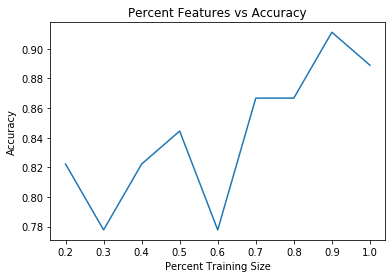

In [7]:
plt.plot(train_sizes, accuracy)
plt.xlabel("Percent Training Size")
plt.ylabel("Accuracy")
plt.title("Percent Features vs Accuracy")
plt.show()